Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib.dates as mdates

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

# Data merging & processing

In [2]:
df1 = pd.read_csv("Dataset/Project_Zip.csv")
df2 = pd.read_csv("Dataset/SolarData.csv")

C:\Users\prite\AppData\Local\Temp\ipykernel_23340\1870033791.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv("Dataset/SolarData.csv")


In [3]:
df1

,ZIP,Mean_Income,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Number of Projects
0,10001,170154,112.49,95.20,132044,4
1,10002,76115,877.56,739.00,1030117,14
2,10003,222765,350.01,295.06,410844,12
3,10004,317203,134.47,113.00,157846,3
4,10005,225528,89.25,75.00,104765,1
...,...,...,...,...,...,...
1619,14898,67776,32.76,28.00,38454,2
1620,14901,51814,817.83,688.74,959990,14
1621,14903,100790,711.16,601.86,834775,29
1622,14904,63579,20.88,17.85,24515,2


In [4]:
df2

,City,ZIP,Total PV Module Quantity,Project Cost,Total NYSERDA Incentive,Expected KWh Annual Production,Latitude,Longitude,Sector,Date Application Received,Date Completed,Project Status
0,Trumansburg,14886,18,0.0,0,0,42.458284,-76.783772,Residential,6/22/2007,10/25/2007,Complete
1,Brier Hill,13614,30,37950.0,12250,7473,44.524406,-75.614506,Residential,10/18/2011,6/25/2012,Complete
2,Middleburgh,12122,76,75900.0,20900,25634,42.615494,-74.300752,Residential,9/24/2014,5/11/2015,Complete
3,Ithaca,14850,30,51502.0,8829,10467,42.463035,-76.540550,Residential,11/12/2014,1/7/2016,Complete
4,Newburgh,12550,24,39240.0,7848,6858,41.575012,-74.016390,Residential,7/17/2014,1/21/2015,Complete
...,...,...,...,...,...,...,...,...,...,...,...,...
156713,Newburgh,12550,48,66400.0,4032,18812,41.540593,-74.008595,Residential,8/17/2023,NaN,Pipeline
156714,Huntington Station,11746,23,36073.0,0,12527,40.822530,-73.384482,Residential,8/15/2023,NaN,Pipeline
156715,Sound Beach,11789,40,45003.0,0,16847,40.964399,-72.972128,Residential,9/26/2023,NaN,Pipeline
156716,Westtown,10998,14,20200.0,1176,6769,41.324076,-74.541179,Residential,9/14/2023,NaN,Pipeline


In [5]:
df2.drop(columns = ['City'] , inplace = True)
df2

,ZIP,Total PV Module Quantity,Project Cost,Total NYSERDA Incentive,Expected KWh Annual Production,Latitude,Longitude,Sector,Date Application Received,Date Completed,Project Status
0,14886,18,0.0,0,0,42.458284,-76.783772,Residential,6/22/2007,10/25/2007,Complete
1,13614,30,37950.0,12250,7473,44.524406,-75.614506,Residential,10/18/2011,6/25/2012,Complete
2,12122,76,75900.0,20900,25634,42.615494,-74.300752,Residential,9/24/2014,5/11/2015,Complete
3,14850,30,51502.0,8829,10467,42.463035,-76.540550,Residential,11/12/2014,1/7/2016,Complete
4,12550,24,39240.0,7848,6858,41.575012,-74.016390,Residential,7/17/2014,1/21/2015,Complete
...,...,...,...,...,...,...,...,...,...,...,...
156713,12550,48,66400.0,4032,18812,41.540593,-74.008595,Residential,8/17/2023,NaN,Pipeline
156714,11746,23,36073.0,0,12527,40.822530,-73.384482,Residential,8/15/2023,NaN,Pipeline
156715,11789,40,45003.0,0,16847,40.964399,-72.972128,Residential,9/26/2023,NaN,Pipeline
156716,10998,14,20200.0,1176,6769,41.324076,-74.541179,Residential,9/14/2023,NaN,Pipeline


In [6]:
df2.isnull().sum()

ZIP                                  0
Total PV Module Quantity             0
Project Cost                         0
Total NYSERDA Incentive              0
Expected KWh Annual Production       0
Latitude                           506
Longitude                          506
Sector                               0
Date Application Received            0
Date Completed                    8812
Project Status                       0
dtype: int64

In [7]:
df2.dropna(inplace = True)
df2

,ZIP,Total PV Module Quantity,Project Cost,Total NYSERDA Incentive,Expected KWh Annual Production,Latitude,Longitude,Sector,Date Application Received,Date Completed,Project Status
0,14886,18,0.0,0,0,42.458284,-76.783772,Residential,6/22/2007,10/25/2007,Complete
1,13614,30,37950.0,12250,7473,44.524406,-75.614506,Residential,10/18/2011,6/25/2012,Complete
2,12122,76,75900.0,20900,25634,42.615494,-74.300752,Residential,9/24/2014,5/11/2015,Complete
3,14850,30,51502.0,8829,10467,42.463035,-76.540550,Residential,11/12/2014,1/7/2016,Complete
4,12550,24,39240.0,7848,6858,41.575012,-74.016390,Residential,7/17/2014,1/21/2015,Complete
...,...,...,...,...,...,...,...,...,...,...,...
156670,10940,39,74925.0,3159,14321,41.402955,-74.463263,Residential,8/15/2023,8/25/2023,Complete
156688,11411,7,10252.8,358,2430,40.698469,-73.731184,Residential,9/19/2023,9/27/2023,Complete
156694,12603,25,34750.0,2100,10311,41.666537,-73.860745,Residential,9/8/2023,9/29/2023,Complete
156700,10502,21,31563.0,1785,9692,41.013550,-73.839381,Residential,8/17/2023,9/21/2023,Complete


In [8]:
df = pd.merge(df1, df2, on = 'ZIP', how = 'inner')
df.to_csv("Dataset/Solar_Data_Final.csv", index = False)

# Exploratory Data Analysis

C:\Users\prite\AppData\Local\Temp\ipykernel_23340\812015435.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


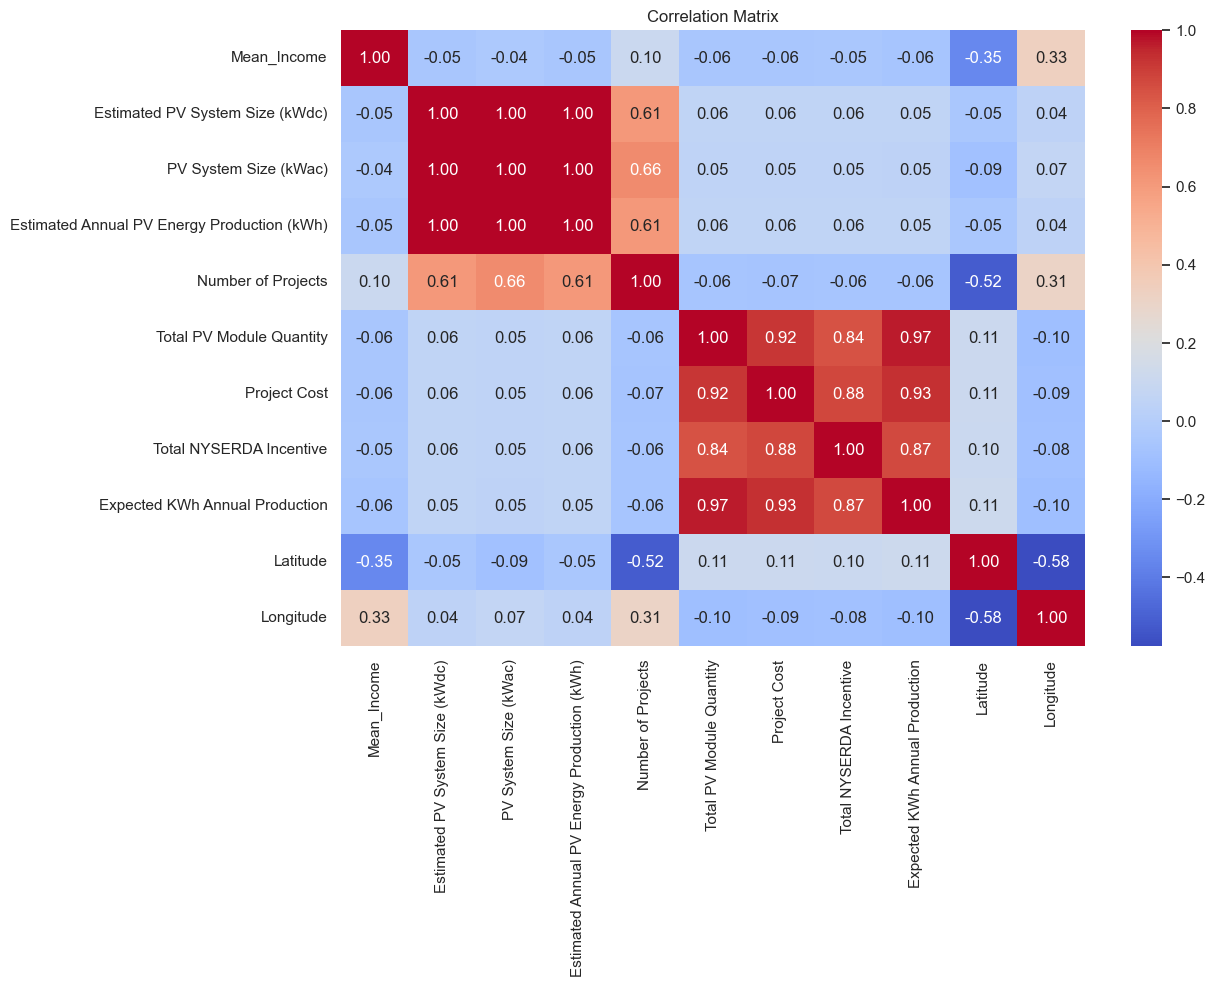

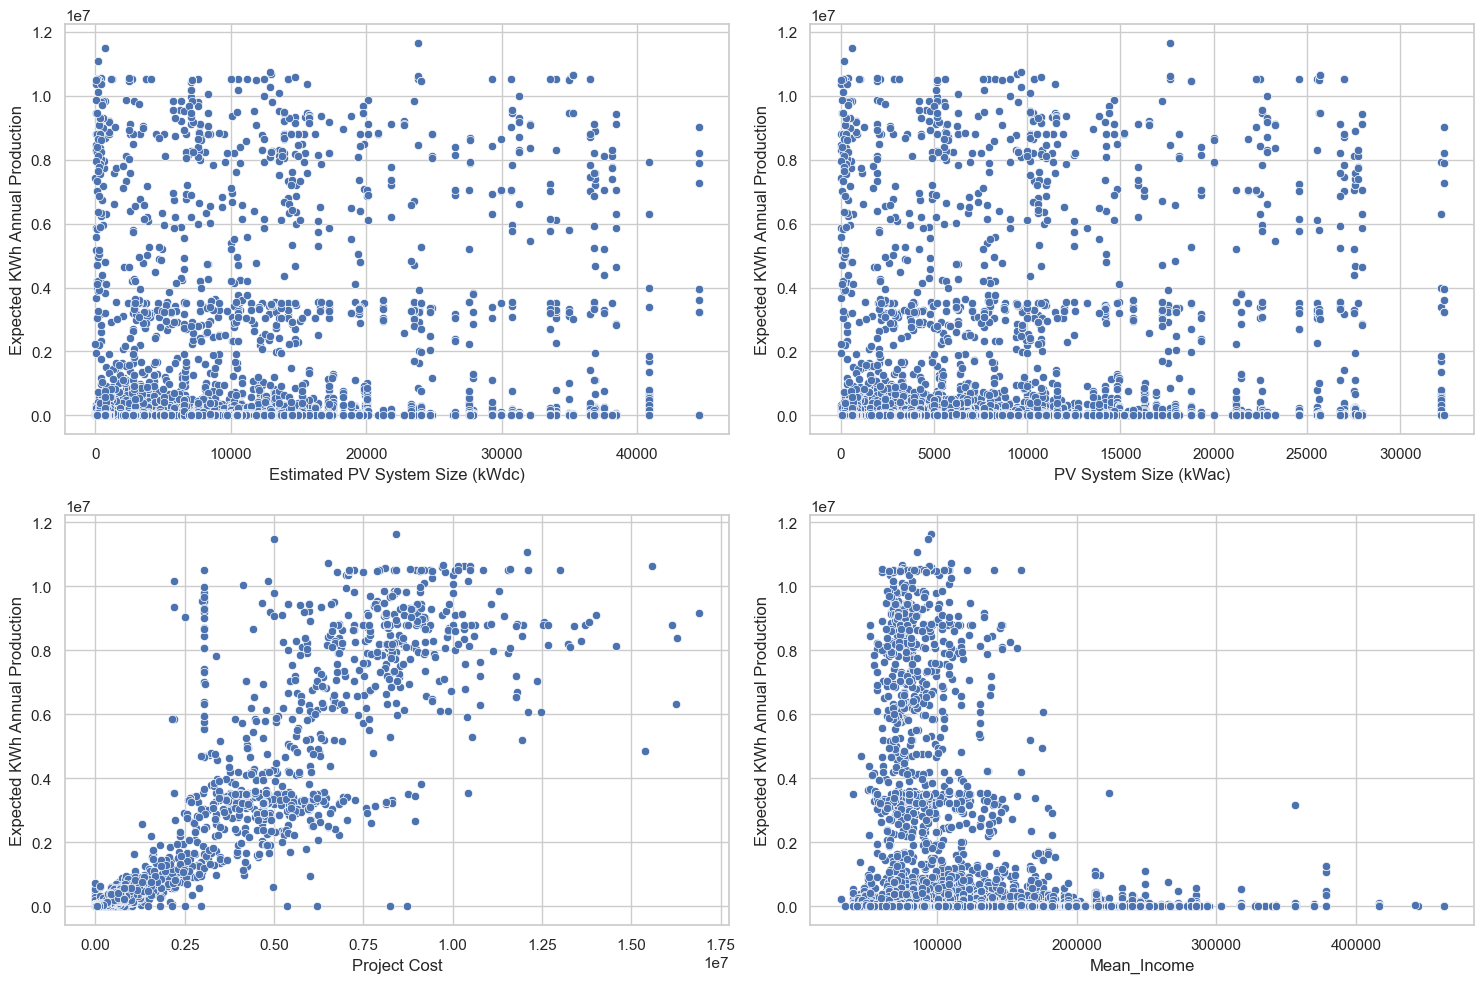

In [9]:
# Set the style for the plots
sns.set(style="whitegrid")

# Correlation matrix
correlation_matrix = df.corr()

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

# Scatter plot for the target variable and some potential predictors
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))

# Scatter plots for potential predictors
sns.scatterplot(data=df, x='Estimated PV System Size (kWdc)', y='Expected KWh Annual Production', ax=axes[0, 0])
sns.scatterplot(data=df, x='PV System Size (kWac)', y='Expected KWh Annual Production', ax=axes[0, 1])
sns.scatterplot(data=df, x='Project Cost', y='Expected KWh Annual Production', ax=axes[1, 0])
sns.scatterplot(data=df, x='Mean_Income', y='Expected KWh Annual Production', ax=axes[1, 1])

plt.tight_layout()
plt.savefig("Images/Scatter plot for the target variable and some potential predictors.png")
plt.show()


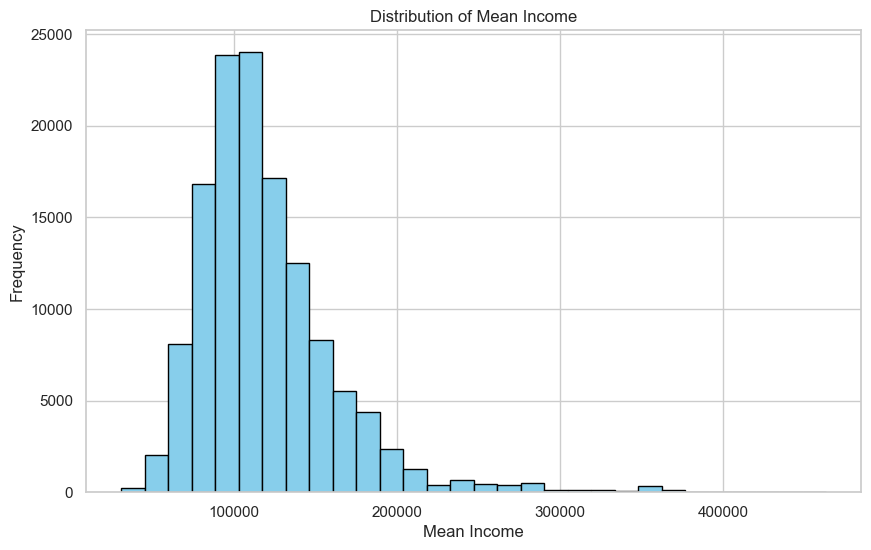

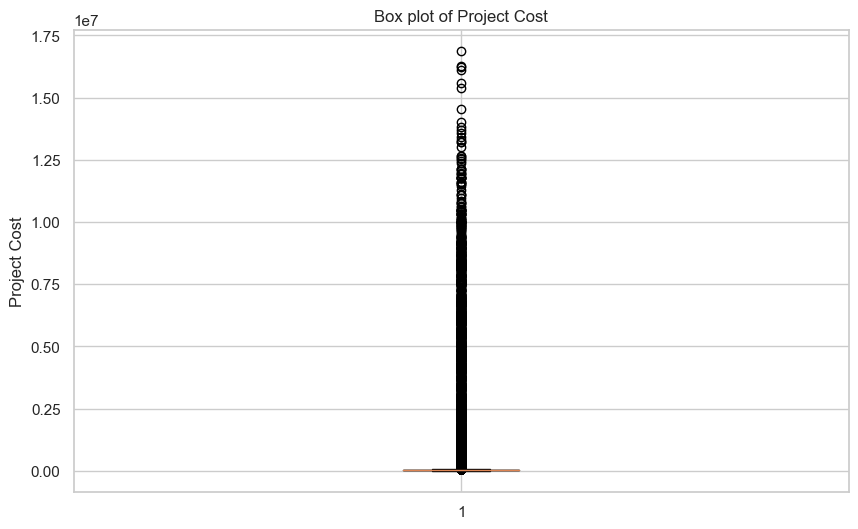

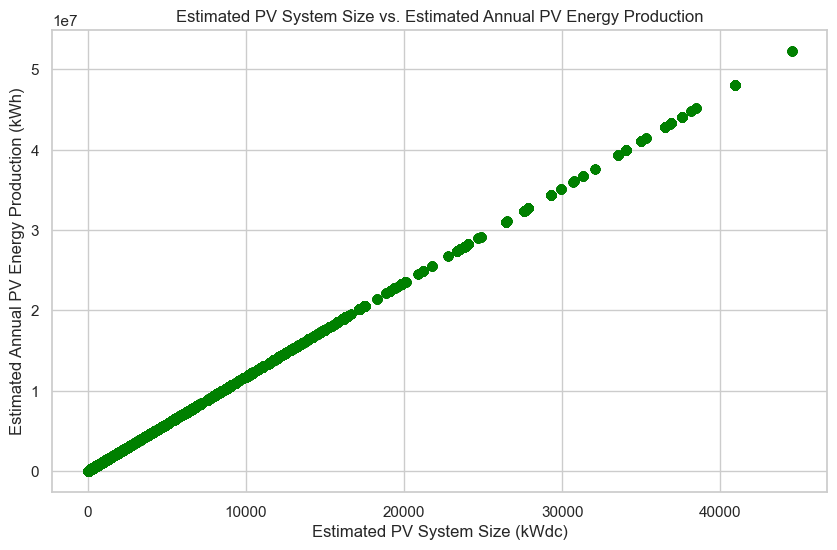

In [10]:
# EDA for the distribution of different variables
# Histogram for Mean Income
plt.figure(figsize=(10, 6))
plt.hist(df['Mean_Income'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Mean Income')
plt.xlabel('Mean Income')
plt.ylabel('Frequency')
plt.savefig("Images/Distribution of Mean Income.png")
plt.show()

# Box plot for Project Cost
plt.figure(figsize=(10, 6))
plt.boxplot(df['Project Cost'])
plt.title('Box plot of Project Cost')
plt.ylabel('Project Cost')
plt.savefig("Images/Box plot of Project Cost.png")
plt.show()

# Scatter plot for Estimated PV System Size vs. Estimated Annual PV Energy Production
plt.figure(figsize=(10, 6))
plt.scatter(df['Estimated PV System Size (kWdc)'], df['Estimated Annual PV Energy Production (kWh)'], color='green')
plt.title('Estimated PV System Size vs. Estimated Annual PV Energy Production')
plt.xlabel('Estimated PV System Size (kWdc)')
plt.ylabel('Estimated Annual PV Energy Production (kWh)')
plt.savefig("Images/Estimated PV System Size vs. Estimated Annual PV Energy Production.png")
plt.show()


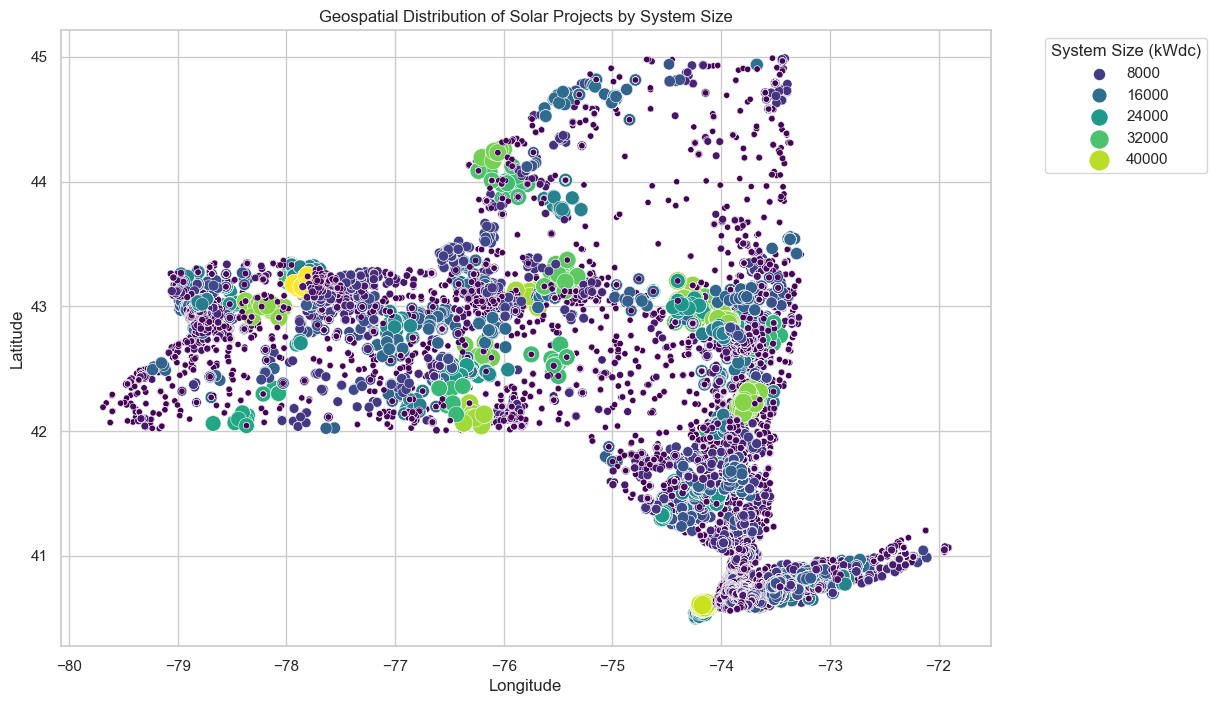

In [11]:
plt.figure(figsize=(12, 8))

# Scatter plot with latitude and longitude, color-coded by the estimated PV system size
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Estimated PV System Size (kWdc)', palette='viridis', size='Estimated PV System Size (kWdc)', sizes=(20, 200))

plt.title('Geospatial Distribution of Solar Projects by System Size')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='System Size (kWdc)', bbox_to_anchor=(1.05, 1), loc=2)
plt.grid(True)
plt.show()


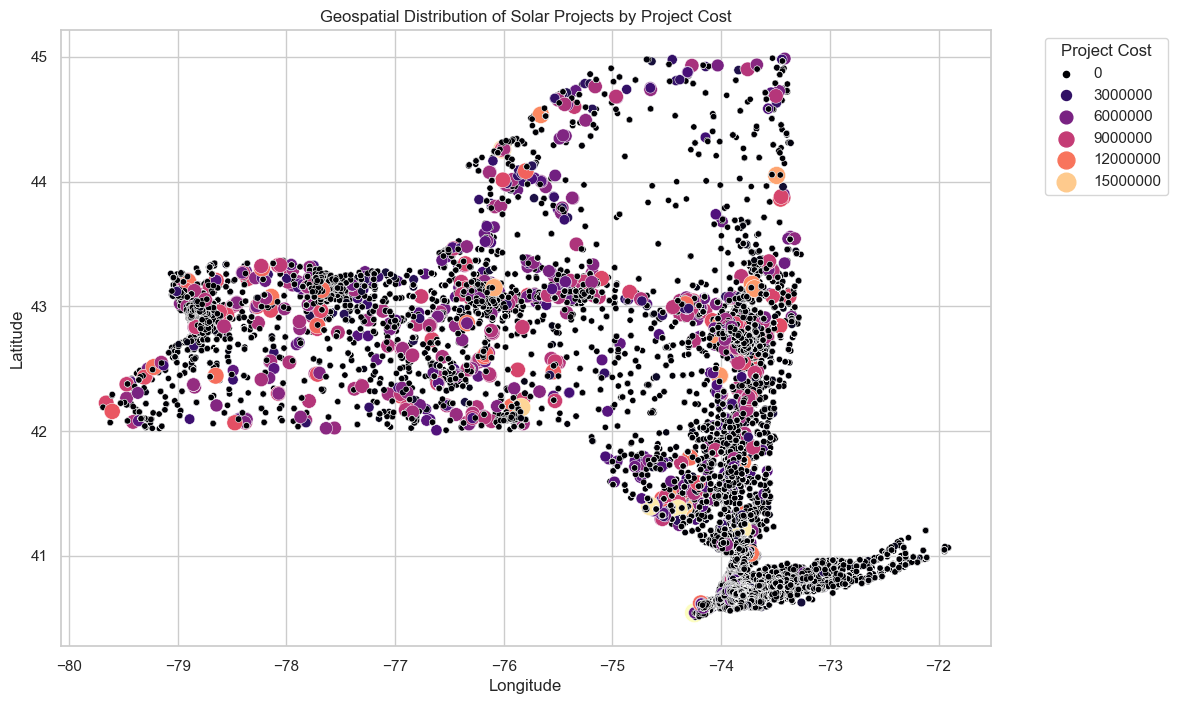

In [12]:
plt.figure(figsize=(12, 8))

# Scatter plot with latitude and longitude, color-coded by project cost
sns.scatterplot(data=df, x='Longitude', y='Latitude', hue='Project Cost', palette='magma', size='Project Cost', sizes=(20, 200))

plt.title('Geospatial Distribution of Solar Projects by Project Cost')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.legend(title='Project Cost', bbox_to_anchor=(1.05, 1), loc=2)
plt.grid(True)
plt.show()


In [13]:
# Converting date columns to datetime format for temporal analysis
df['Date Application Received'] = pd.to_datetime(df['Date Application Received'], errors='coerce')
df['Date Completed'] = pd.to_datetime(df['Date Completed'], errors='coerce')

# Extracting year and month from the date columns for further analysis
df['Application Year'] = df['Date Application Received'].dt.year
df['Application Month'] = df['Date Application Received'].dt.month
df['Completion Year'] = df['Date Completed'].dt.year
df['Completion Month'] = df['Date Completed'].dt.month

# Checking the first few rows to confirm the changes
df.head()


,ZIP,Mean_Income,Estimated PV System Size (kWdc),PV System Size (kWac),Estimated Annual PV Energy Production (kWh),Number of Projects,Total PV Module Quantity,Project Cost,Total NYSERDA Incentive,Expected KWh Annual Production,Latitude,Longitude,Sector,Date Application Received,Date Completed,Project Status,Application Year,Application Month,Completion Year,Completion Month
0,10001,170154,112.49,95.2,132044,4,88,156541.00,40286,36123,40.752217,-74.002998,Non-Residential,2016-02-18,2016-06-16,Complete,2016,2,2016,6
1,10001,170154,112.49,95.2,132044,4,99,170101.06,12118,28048,40.746232,-73.994315,Non-Residential,2019-04-02,2019-04-26,Complete,2019,4,2019,4
2,10002,76115,877.56,739.0,1030117,14,39,64672.00,14100,13147,40.719745,-73.991352,Non-Residential,2016-01-29,2016-05-17,Complete,2016,1,2016,5
3,10002,76115,877.56,739.0,1030117,14,62,0.00,0,0,40.714234,-73.992397,Non-Residential,2016-01-25,2016-05-25,Complete,2016,1,2016,5
4,10002,76115,877.56,739.0,1030117,14,13,17973.00,3738,4106,40.712357,-73.994933,Non-Residential,2013-06-07,2013-12-06,Complete,2013,6,2013,12


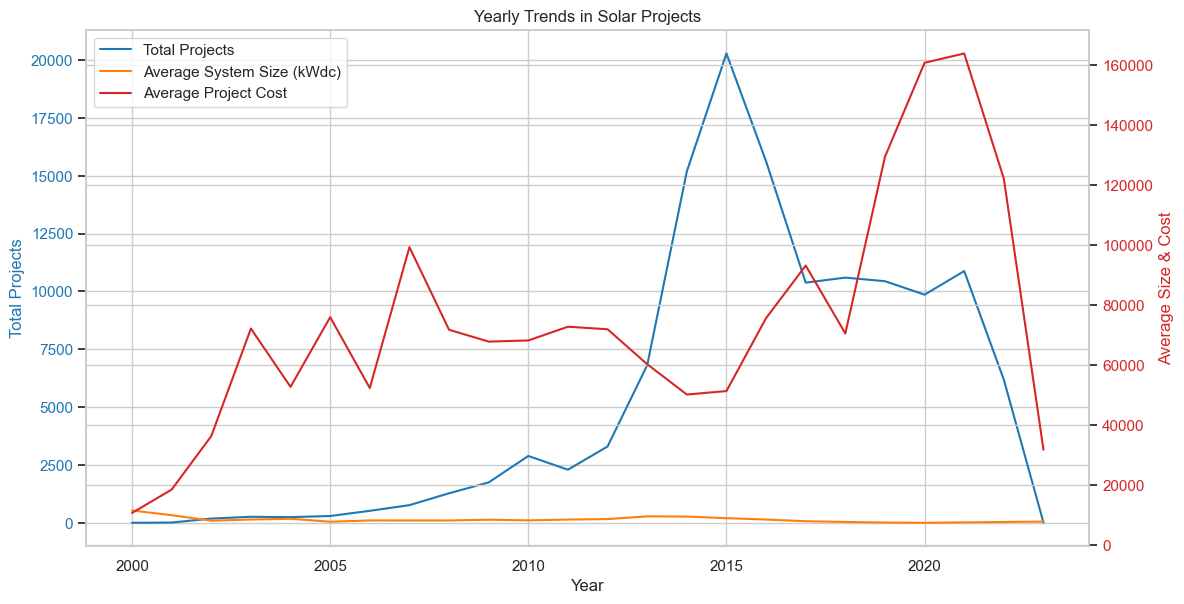

In [14]:
# Grouping the data by application year and aggregating relevant metrics
yearly_trends = df.groupby('Application Year').agg(
    Total_Projects=('ZIP', 'count'),
    Average_System_Size_kWdc=('Estimated PV System Size (kWdc)', 'mean'),
    Average_Project_Cost=('Project Cost', 'mean')
).reset_index()

# Plotting the yearly trends
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plotting total projects
ax1.set_xlabel('Year')
ax1.set_ylabel('Total Projects', color='tab:blue')
ax1.plot(yearly_trends['Application Year'], yearly_trends['Total_Projects'], color='tab:blue', label='Total Projects')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Setting up a second y-axis to plot average system size and project cost
ax2 = ax1.twinx()
ax2.set_ylabel('Average Size & Cost', color='tab:red')
ax2.plot(yearly_trends['Application Year'], yearly_trends['Average_System_Size_kWdc'], color='tab:orange', label='Average System Size (kWdc)')
ax2.plot(yearly_trends['Application Year'], yearly_trends['Average_Project_Cost'], color='tab:red', label='Average Project Cost')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Adding a legend and title
fig.tight_layout()
plt.title('Yearly Trends in Solar Projects')
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)
plt.show()


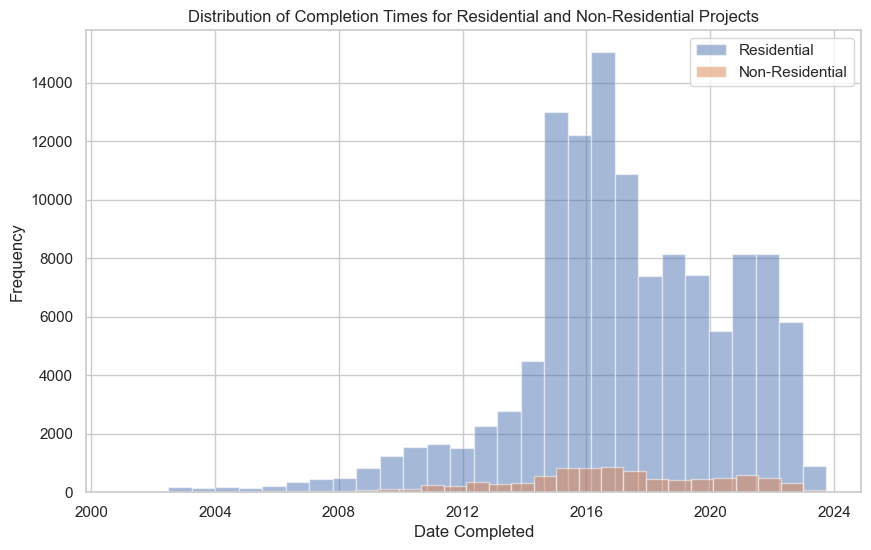

In [15]:
# Convert 'Date Completed' to datetime
df['Date Completed'] = pd.to_datetime(df['Date Completed'])

# Segment the data into residential and non-residential projects
residential_projects = df[df['Sector'] == 'Residential']
non_residential_projects = df[df['Sector'] == 'Non-Residential']

# Visualize the distribution of completion times using histograms
plt.figure(figsize=(10, 6))
plt.hist(residential_projects['Date Completed'], bins=30, alpha=0.5, label='Residential')
plt.hist(non_residential_projects['Date Completed'], bins=30, alpha=0.5, label='Non-Residential')
plt.xlabel('Date Completed')
plt.ylabel('Frequency')
plt.title('Distribution of Completion Times for Residential and Non-Residential Projects')
plt.legend()
plt.savefig("Images/Distribution of Completion Times for Residential and Non-Residential Projects.png")
plt.show()


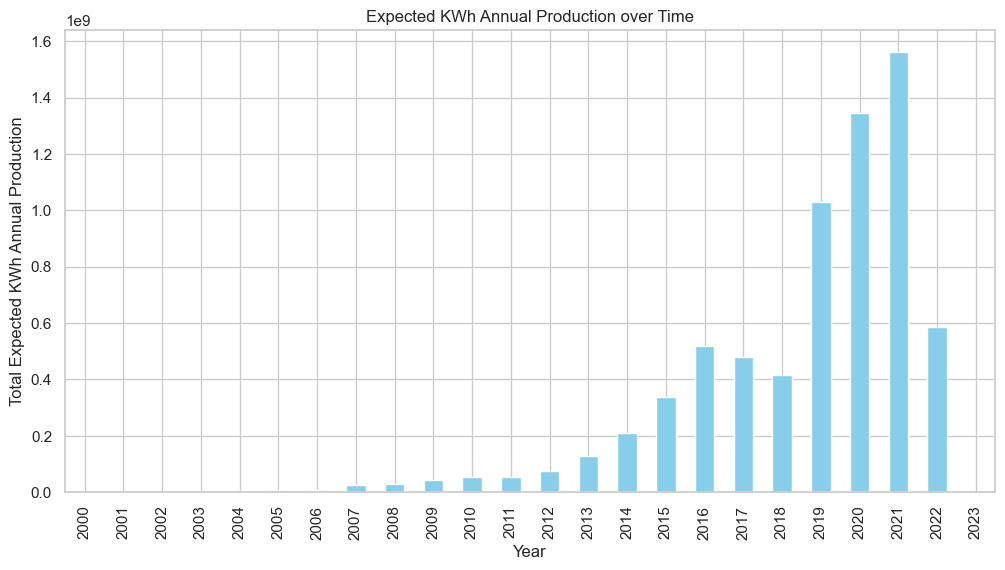

In [16]:
# Create a bar plot to visualize the expected kWh annual production over time
plt.figure(figsize=(12, 6))
df.groupby(df['Date Application Received'].dt.year)['Expected KWh Annual Production'].sum().plot(kind='bar', color='skyblue')
plt.title('Expected KWh Annual Production over Time')
plt.xlabel('Year')
plt.ylabel('Total Expected KWh Annual Production')
plt.show()


In [17]:
# Sector Analysis: Aggregating data by sector
sector_analysis = df.groupby('Sector').agg(
    Total_Projects=('ZIP', 'count'),
    Average_System_Size_kWdc=('Estimated PV System Size (kWdc)', 'mean'),
    Average_Project_Cost=('Project Cost', 'mean'),
    Average_Annual_Production_kWh=('Estimated Annual PV Energy Production (kWh)', 'mean')
).reset_index()

# Project Duration Analysis: Calculating project duration in days
df['Project Duration'] = (df['Date Completed'] - df['Date Application Received']).dt.days
project_duration_analysis = df.groupby('Sector').agg(
    Average_Project_Duration=('Project Duration', 'mean')
).reset_index()

# Displaying the results of the sector and project duration analysis
sector_analysis, project_duration_analysis


(            Sector  Total_Projects  Average_System_Size_kWdc  \
 0  Non-Residential            8864               7724.813328   
 1      Residential          121162               8250.167797   
 
    Average_Project_Cost  Average_Annual_Production_kWh  
 0         862297.075068                   9.067637e+06  
 1          32199.860393                   9.684245e+06  ,
             Sector  Average_Project_Duration
 0  Non-Residential                159.714801
 1      Residential                152.277562)

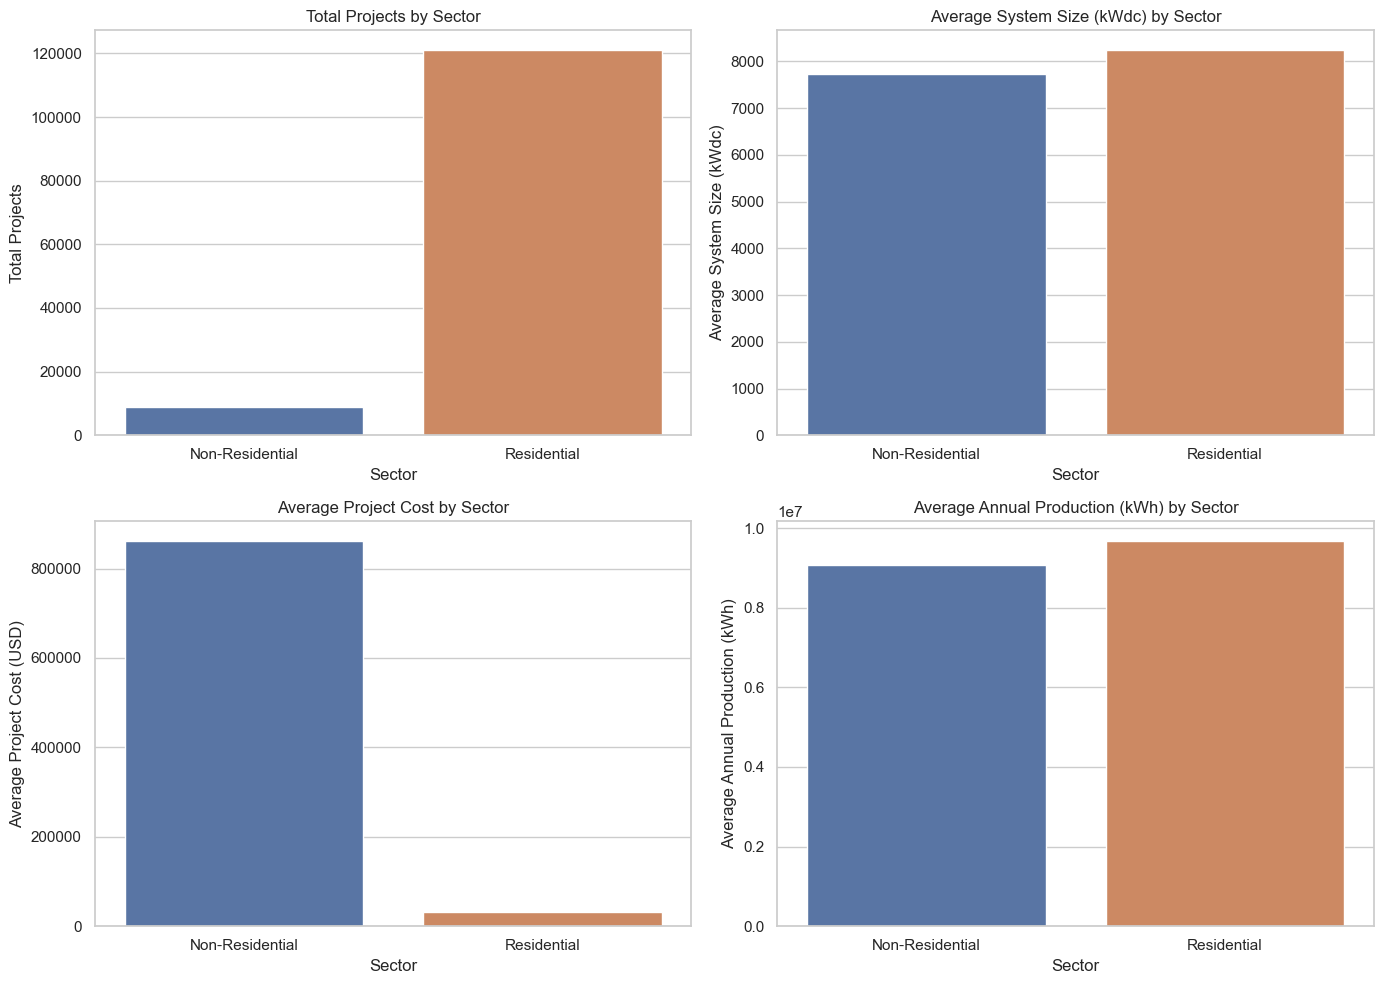

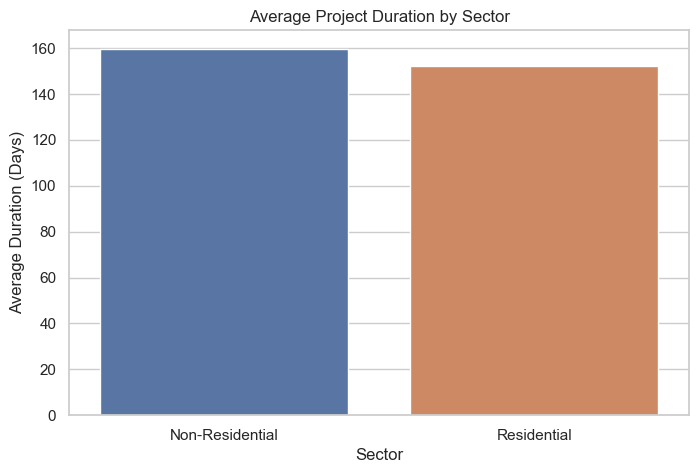

In [18]:
# Setting up the figure for multiple plots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plotting total projects by sector
sns.barplot(x='Sector', y='Total_Projects', data=sector_analysis, ax=axs[0, 0])
axs[0, 0].set_title('Total Projects by Sector')
axs[0, 0].set_ylabel('Total Projects')

# Plotting average system size by sector
sns.barplot(x='Sector', y='Average_System_Size_kWdc', data=sector_analysis, ax=axs[0, 1])
axs[0, 1].set_title('Average System Size (kWdc) by Sector')
axs[0, 1].set_ylabel('Average System Size (kWdc)')

# Plotting average project cost by sector
sns.barplot(x='Sector', y='Average_Project_Cost', data=sector_analysis, ax=axs[1, 0])
axs[1, 0].set_title('Average Project Cost by Sector')
axs[1, 0].set_ylabel('Average Project Cost (USD)')

# Plotting average annual production by sector
sns.barplot(x='Sector', y='Average_Annual_Production_kWh', data=sector_analysis, ax=axs[1, 1])
axs[1, 1].set_title('Average Annual Production (kWh) by Sector')
axs[1, 1].set_ylabel('Average Annual Production (kWh)')

plt.tight_layout()
plt.show()

# Now, plotting the project duration by sector
plt.figure(figsize=(8, 5))
sns.barplot(x='Sector', y='Average_Project_Duration', data=project_duration_analysis)
plt.title('Average Project Duration by Sector')
plt.ylabel('Average Duration (Days)')
plt.show()


# Modelling

In [19]:
# Categorical Data Encoding
encoder = OneHotEncoder(sparse=False)
encoded_columns = encoder.fit_transform(df[['Sector', 'Project Status']])
encoded_columns_df = pd.DataFrame(encoded_columns, columns=encoder.get_feature_names_out(['Sector', 'Project Status']))

# Combining the encoded columns with the original dataset
prepared_data = df.join(encoded_columns_df)

# Dropping the original categorical columns as they have been encoded
prepared_data.drop(['Sector', 'Project Status'], axis=1, inplace=True)

# Data Splitting
# Assuming we are predicting 'Project Cost', we'll set it as the target variable
X = prepared_data.drop('Project Cost', axis=1)
y = prepared_data['Project Cost']

# Splitting the data into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Checking the shape of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape


C:\Users\prite\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\preprocessing\_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


((91018, 21), (39008, 21), (91018,), (39008,))

Linear Regression

In [20]:
# Removing the original datetime columns from the feature set
X_train_processed = X_train.drop(['Date Application Received', 'Date Completed'], axis=1)
X_test_processed = X_test.drop(['Date Application Received', 'Date Completed'], axis=1)

# Retraining the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_processed, y_train)

# Predicting on the processed test data
y_pred_linear = linear_model.predict(X_test_processed)

# Evaluating the model
mse_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)
r2_linear = r2_score(y_test, y_pred_linear)

print("Mean squared error : " ,mse_linear)
print("Mean absolute error : ",mae_linear)
print("R2 Score : ",r2_linear)

Mean squared error :  41278512473.20423
Mean absolute error :  30163.689365750237
R2 Score :  0.885895886628765


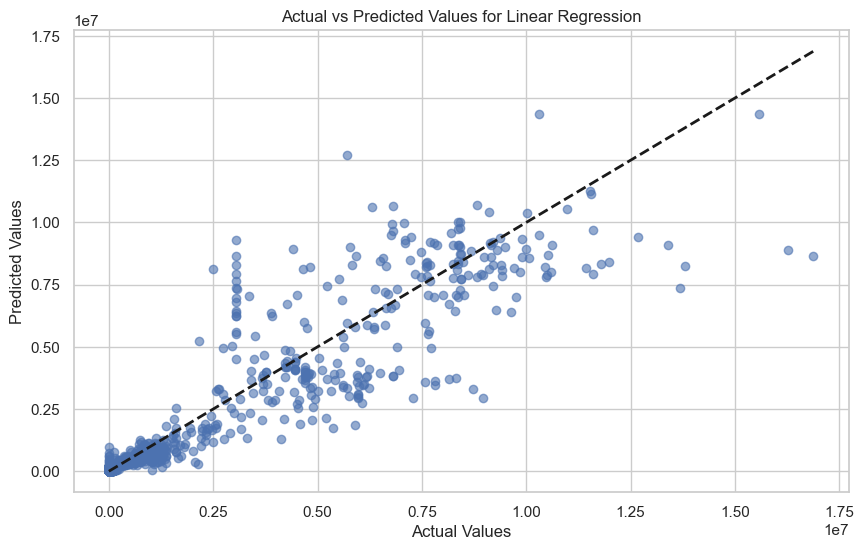

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_linear, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Linear Regression')
plt.show()


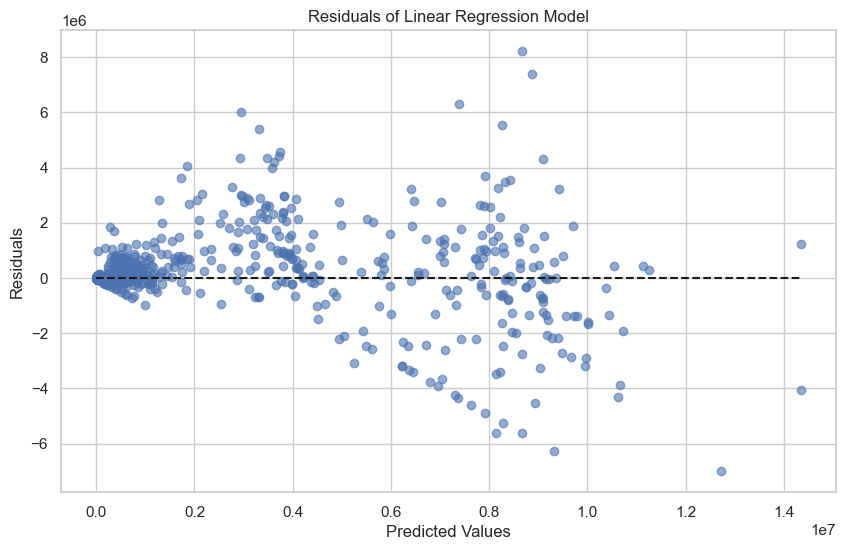

In [22]:
residuals = y_test - y_pred_linear

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_linear, residuals, alpha=0.6)
plt.hlines(y=0, xmin=y_pred_linear.min(), xmax=y_pred_linear.max(), colors='k', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals of Linear Regression Model')
plt.show()


Decision Tree Regressor

In [23]:
# Creating and training a Decision Tree Regression model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train_processed, y_train)
y_pred_dt = decision_tree_model.predict(X_test_processed)

# Evaluating the Decision Tree model
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Mean squared error : " ,mse_dt)
print("Mean absolute error : ",mae_dt)
print("R2 Score : ",r2_dt)


Mean squared error :  45680480222.24966
Mean absolute error :  23964.648325215345
R2 Score :  0.8737277488495838


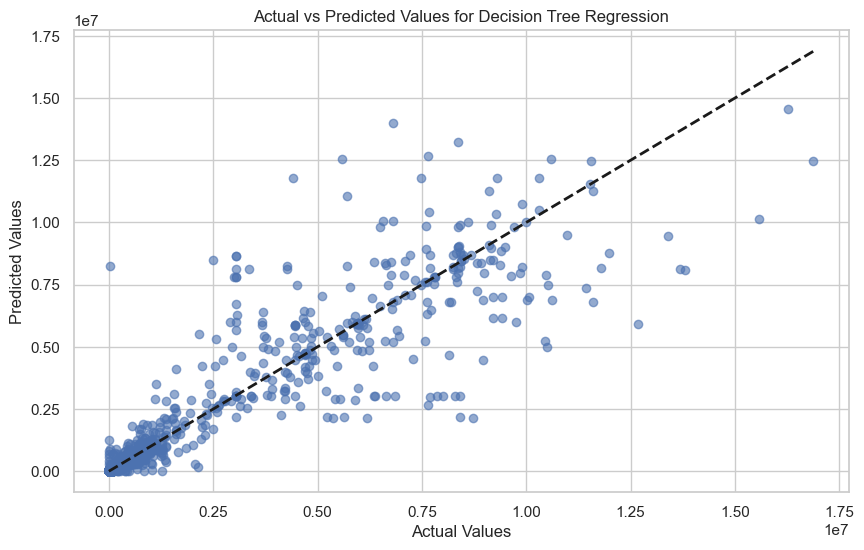

In [24]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Decision Tree Regression')
plt.show()


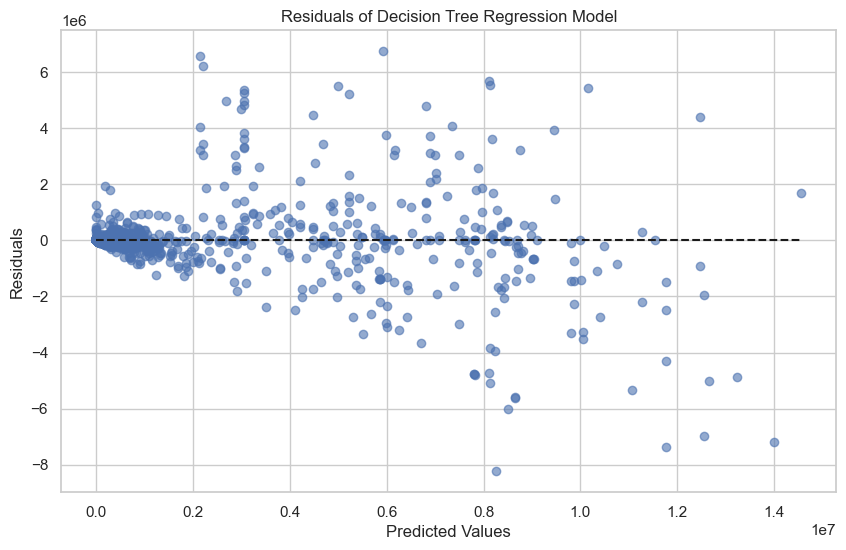

In [25]:
residuals_dt = y_test - y_pred_dt

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_dt, residuals_dt, alpha=0.6)
plt.hlines(y=0, xmin=y_pred_dt.min(), xmax=y_pred_dt.max(), colors='k', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals of Decision Tree Regression Model')
plt.show()


Random Forest Regressor

In [26]:
# Creating and training a Random Forest Regression model
random_forest_model = RandomForestRegressor(random_state=42)
random_forest_model.fit(X_train_processed, y_train)
y_pred_rf = random_forest_model.predict(X_test_processed)

# Evaluating the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Mean squared error : " ,mse_rf)
print("Mean absolute error : ",mae_rf)
print("R2 Score : ",r2_rf)


Mean squared error :  26745567323.241615
Mean absolute error :  18511.199369318692
R2 Score :  0.9260685750725585


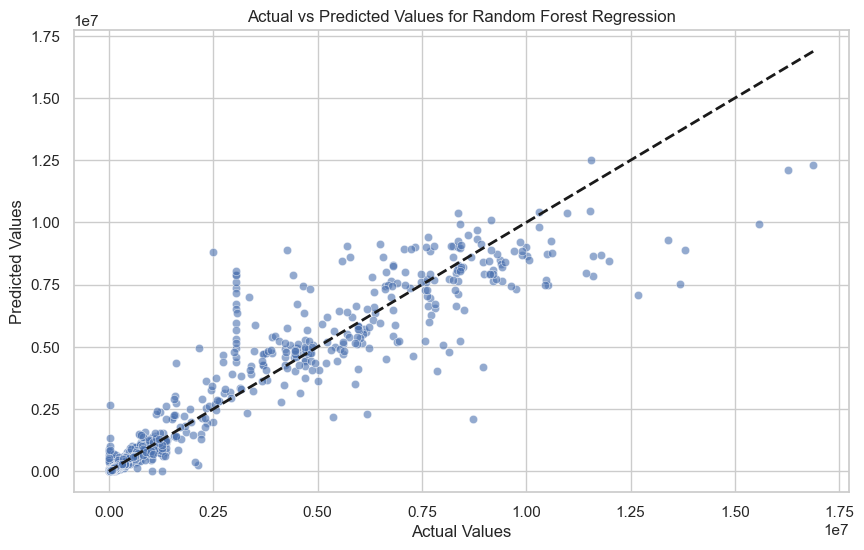

In [27]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_rf, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Random Forest Regression')
plt.show()


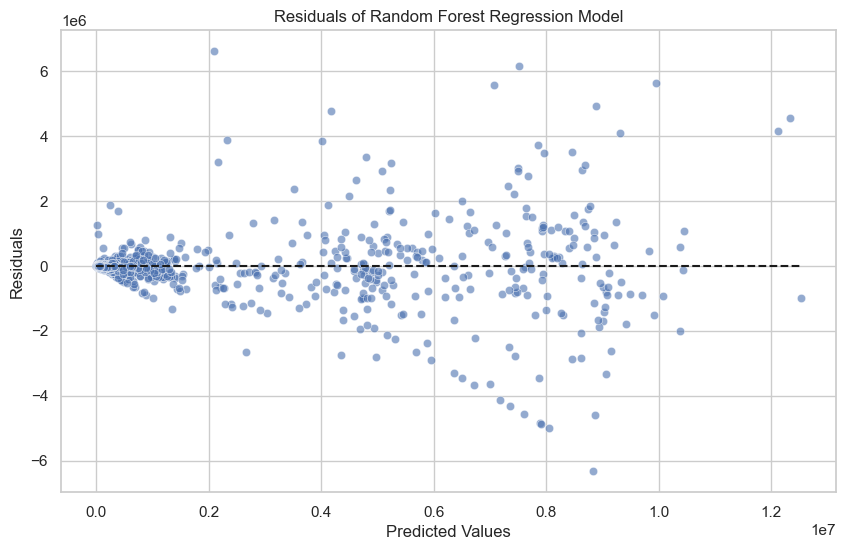

In [28]:
residuals_rf = y_test - y_pred_rf

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_rf, y=residuals_rf, alpha=0.6)
plt.hlines(y=0, xmin=y_pred_rf.min(), xmax=y_pred_rf.max(), colors='k', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals of Random Forest Regression Model')
plt.show()


Gradient Boosting Regressor

In [29]:
# Creating and training a Gradient Boosting Regression model
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
gradient_boosting_model.fit(X_train_processed, y_train)
y_pred_gb = gradient_boosting_model.predict(X_test_processed)

# Evaluating the Gradient Boosting model
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("Mean squared error : " ,mse_gb)
print("Mean absolute error : ",mae_gb)
print("R2 Score : ",r2_gb)


Mean squared error :  28888631145.663895
Mean absolute error :  21476.89061253926
R2 Score :  0.920144611666314


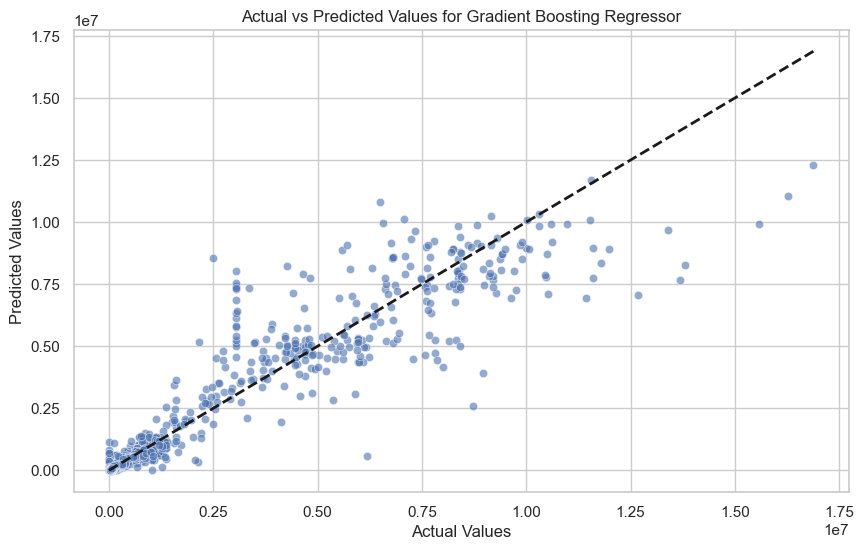

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred_gb, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values for Gradient Boosting Regressor')
plt.show()


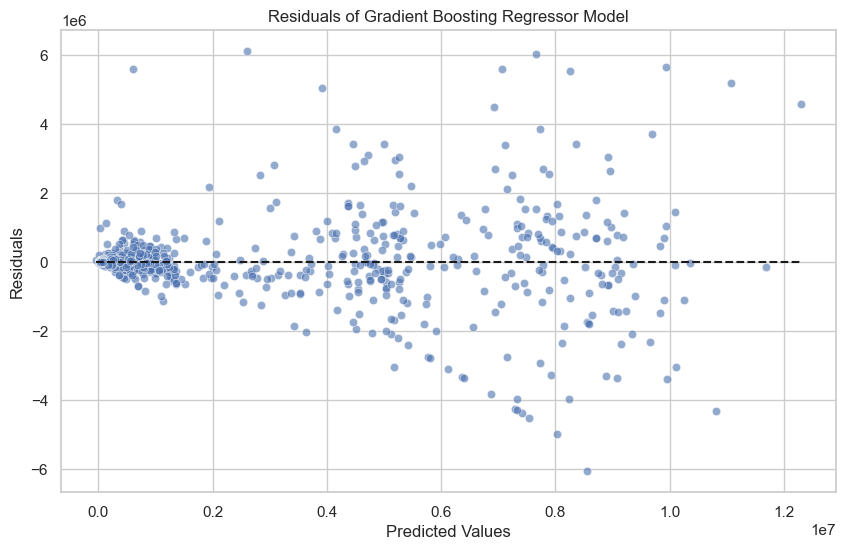

In [31]:
residuals_gb = y_test - y_pred_gb

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_gb, y=residuals_gb, alpha=0.6)
plt.hlines(y=0, xmin=y_pred_gb.min(), xmax=y_pred_gb.max(), colors='k', linestyles='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals of Gradient Boosting Regressor Model')
plt.show()


Result Visualization

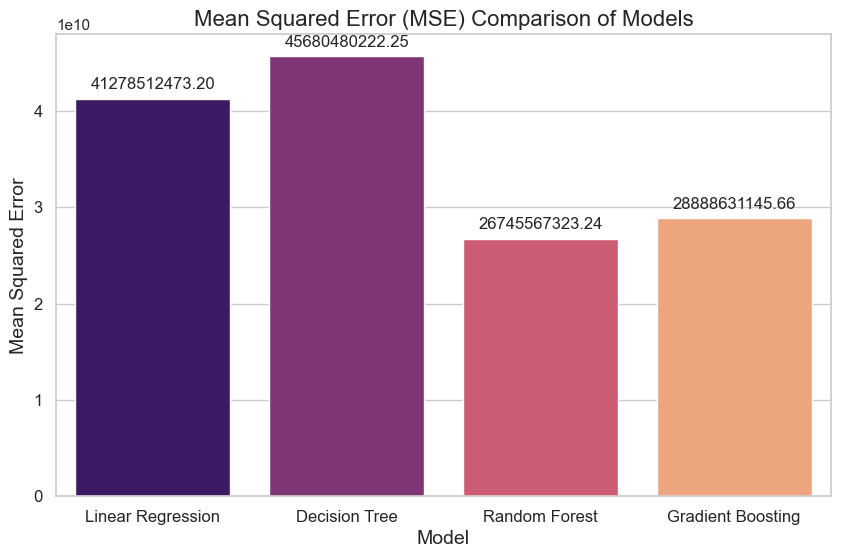

In [32]:
# Aggregating the MSE values
model_mse_values = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'MSE': [mse_linear, mse_dt, mse_rf, mse_gb]
}

# Converting to DataFrame
mse_data = pd.DataFrame(model_mse_values)

# Now you can create your barplot with mse_data
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='MSE', data=mse_data, palette='magma')
plt.title('Mean Squared Error (MSE) Comparison of Models', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Mean Squared Error', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding the data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()


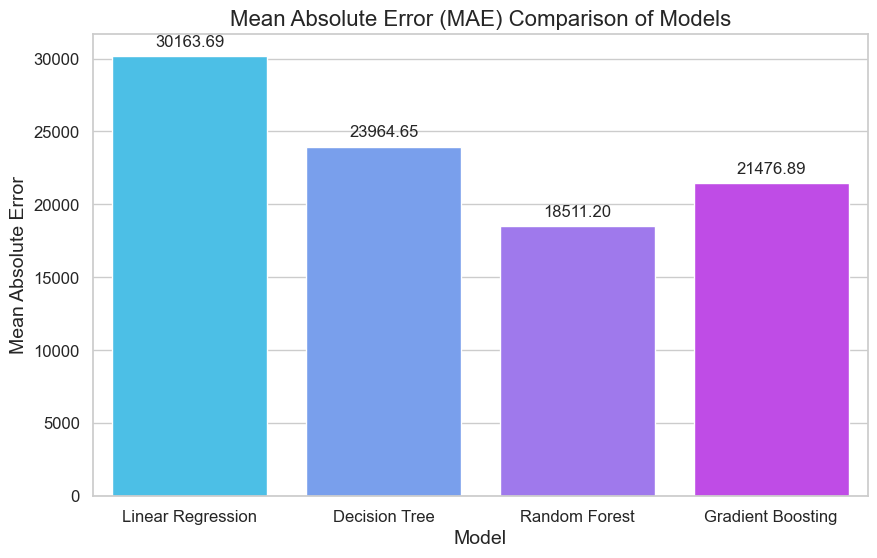

In [33]:
# Aggregating the MSE values
model_mae_values = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'MAE': [mae_linear, mae_dt, mae_rf, mae_gb]
}

# Converting to DataFrame
mae_data = pd.DataFrame(model_mae_values)

# Now you can create your barplot with mse_data
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='MAE', data=mae_data, palette='cool')
plt.title('Mean Absolute Error (MAE) Comparison of Models', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('Mean Absolute Error', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding the data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()


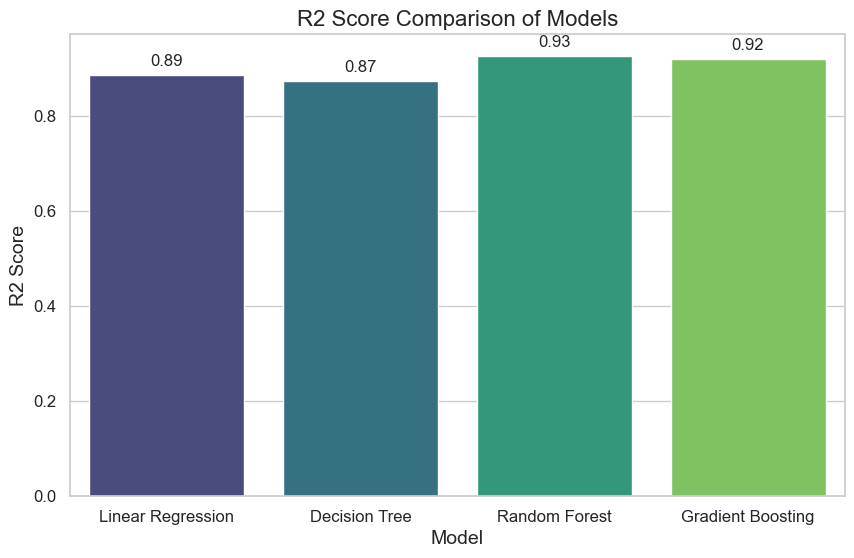

In [34]:
# Aggregating the MSE values
model_r2_values = {
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest', 'Gradient Boosting'],
    'R2 Score': [r2_linear, r2_dt, r2_rf, r2_gb]
}

# Converting to DataFrame
r2_data = pd.DataFrame(model_r2_values)

# Now you can create your barplot with mse_data
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Model', y='R2 Score', data=r2_data, palette='viridis')
plt.title('R2 Score Comparison of Models', fontsize=16)
plt.xlabel('Model', fontsize=14)
plt.ylabel('R2 Score', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Adding the data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

plt.show()
